✅ All libraries imported successfully
📊 Data Loaded:
   Training samples: 832
   Test samples: 209
   Features: 16
   Target range: [64.50, 81.80]
🔧 Model Configurations:
   ✓ KNN
   ✓ DECISION_TREE
   ✓ RANDOM_FOREST
   ✓ SVR
   ✓ RIDGE
TRAINING BASE MODELS WITH 10-FOLD CROSS-VALIDATION

🔄 Training KNN...
   ✅ KNN Trained
      10-Fold CV RMSE: 2.3935 ± 1.0823
      Test RMSE: 2.5839
      Test MAE: 2.0646
      Test R²: 0.1110
      Best Params: {'n_neighbors': 9, 'weights': 'uniform'}

🔄 Training DECISION_TREE...
   ✅ DECISION_TREE Trained
      10-Fold CV RMSE: 2.4084 ± 1.0456
      Test RMSE: 2.5643
      Test MAE: 2.0092
      Test R²: 0.1244
      Best Params: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}

🔄 Training RANDOM_FOREST...
   ✅ RANDOM_FOREST Trained
      10-Fold CV RMSE: 2.2909 ± 1.0372
      Test RMSE: 2.5292
      Test MAE: 1.9710
      Test R²: 0.1482
      Best Params: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}

🔄 Training SVR

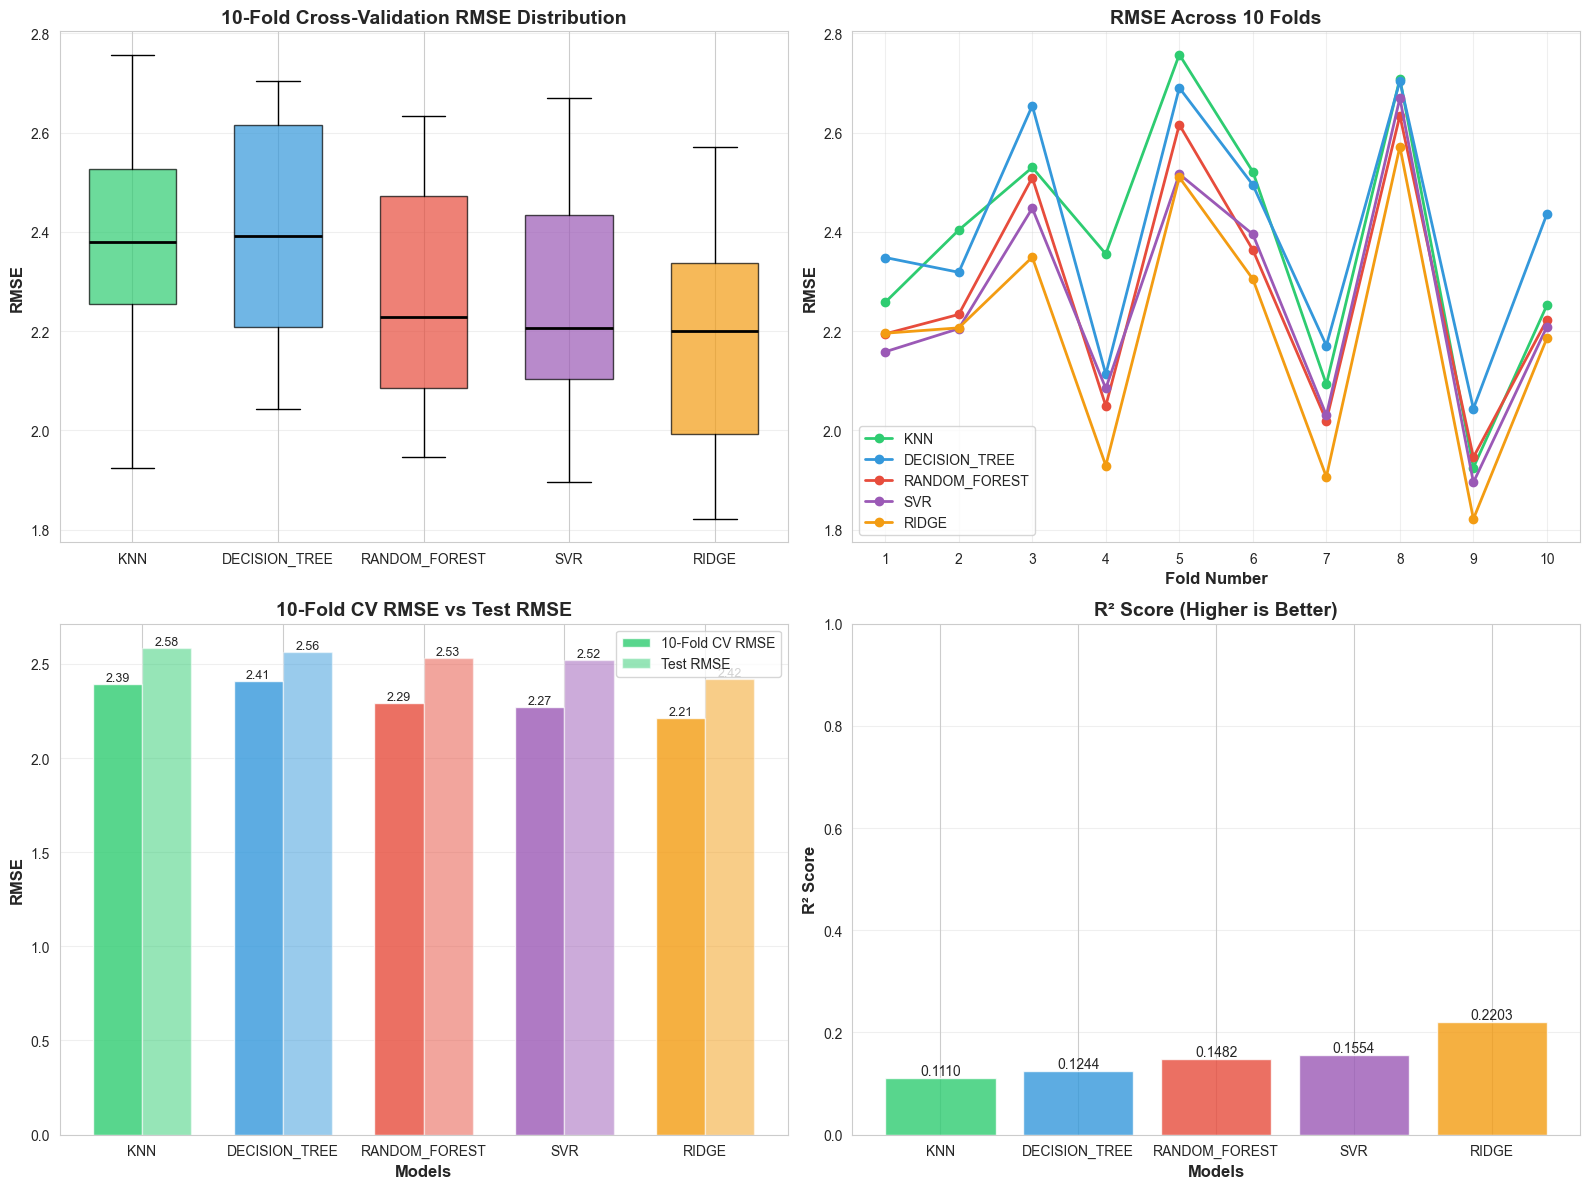


MODEL PERFORMANCE SUMMARY


,Model,CV RMSE,Test RMSE,Test MAE,Test R²
0,KNN,2.3935,2.5839,2.0646,0.1110
1,DECISION_TREE,2.4084,2.5643,2.0092,0.1244
2,RANDOM_FOREST,2.2909,2.5292,1.9710,0.1482
3,SVR,2.2727,2.5185,1.9580,0.1554
4,RIDGE,2.2111,2.4197,1.8676,0.2203



Best Model: RIDGE
   Test RMSE: 2.4197
   Test R²: 0.2203

DETAILED TEST RESULTS

KNN
   Test RMSE: 2.5839
   Test MAE:  2.0646
   Test R²:   0.1110
   10-Fold CV RMSE: 2.3935 ± 1.1715
   Mean Residual: 0.1014
   Std Residual:  2.5819

DECISION_TREE
   Test RMSE: 2.5643
   Test MAE:  2.0092
   Test R²:   0.1244
   10-Fold CV RMSE: 2.4084 ± 1.0933
   Mean Residual: 0.0548
   Std Residual:  2.5637

RANDOM_FOREST
   Test RMSE: 2.5292
   Test MAE:  1.9710
   Test R²:   0.1482
   10-Fold CV RMSE: 2.2909 ± 1.0758
   Mean Residual: 0.0434
   Std Residual:  2.5288

SVR
   Test RMSE: 2.5185
   Test MAE:  1.9580
   Test R²:   0.1554
   10-Fold CV RMSE: 2.2727 ± 1.0431
   Mean Residual: 0.0822
   Std Residual:  2.5171

RIDGE
   Test RMSE: 2.4197
   Test MAE:  1.8676
   Test R²:   0.2203
   10-Fold CV RMSE: 2.2111 ± 1.0470
   Mean Residual: -0.0349
   Std Residual:  2.4195

TEST PREDICTIONS ANALYSIS

KNN
   Total Test Samples: 209
   Mean Absolute Error: 2.0646
   Median Absolute Error: 1.6000
  

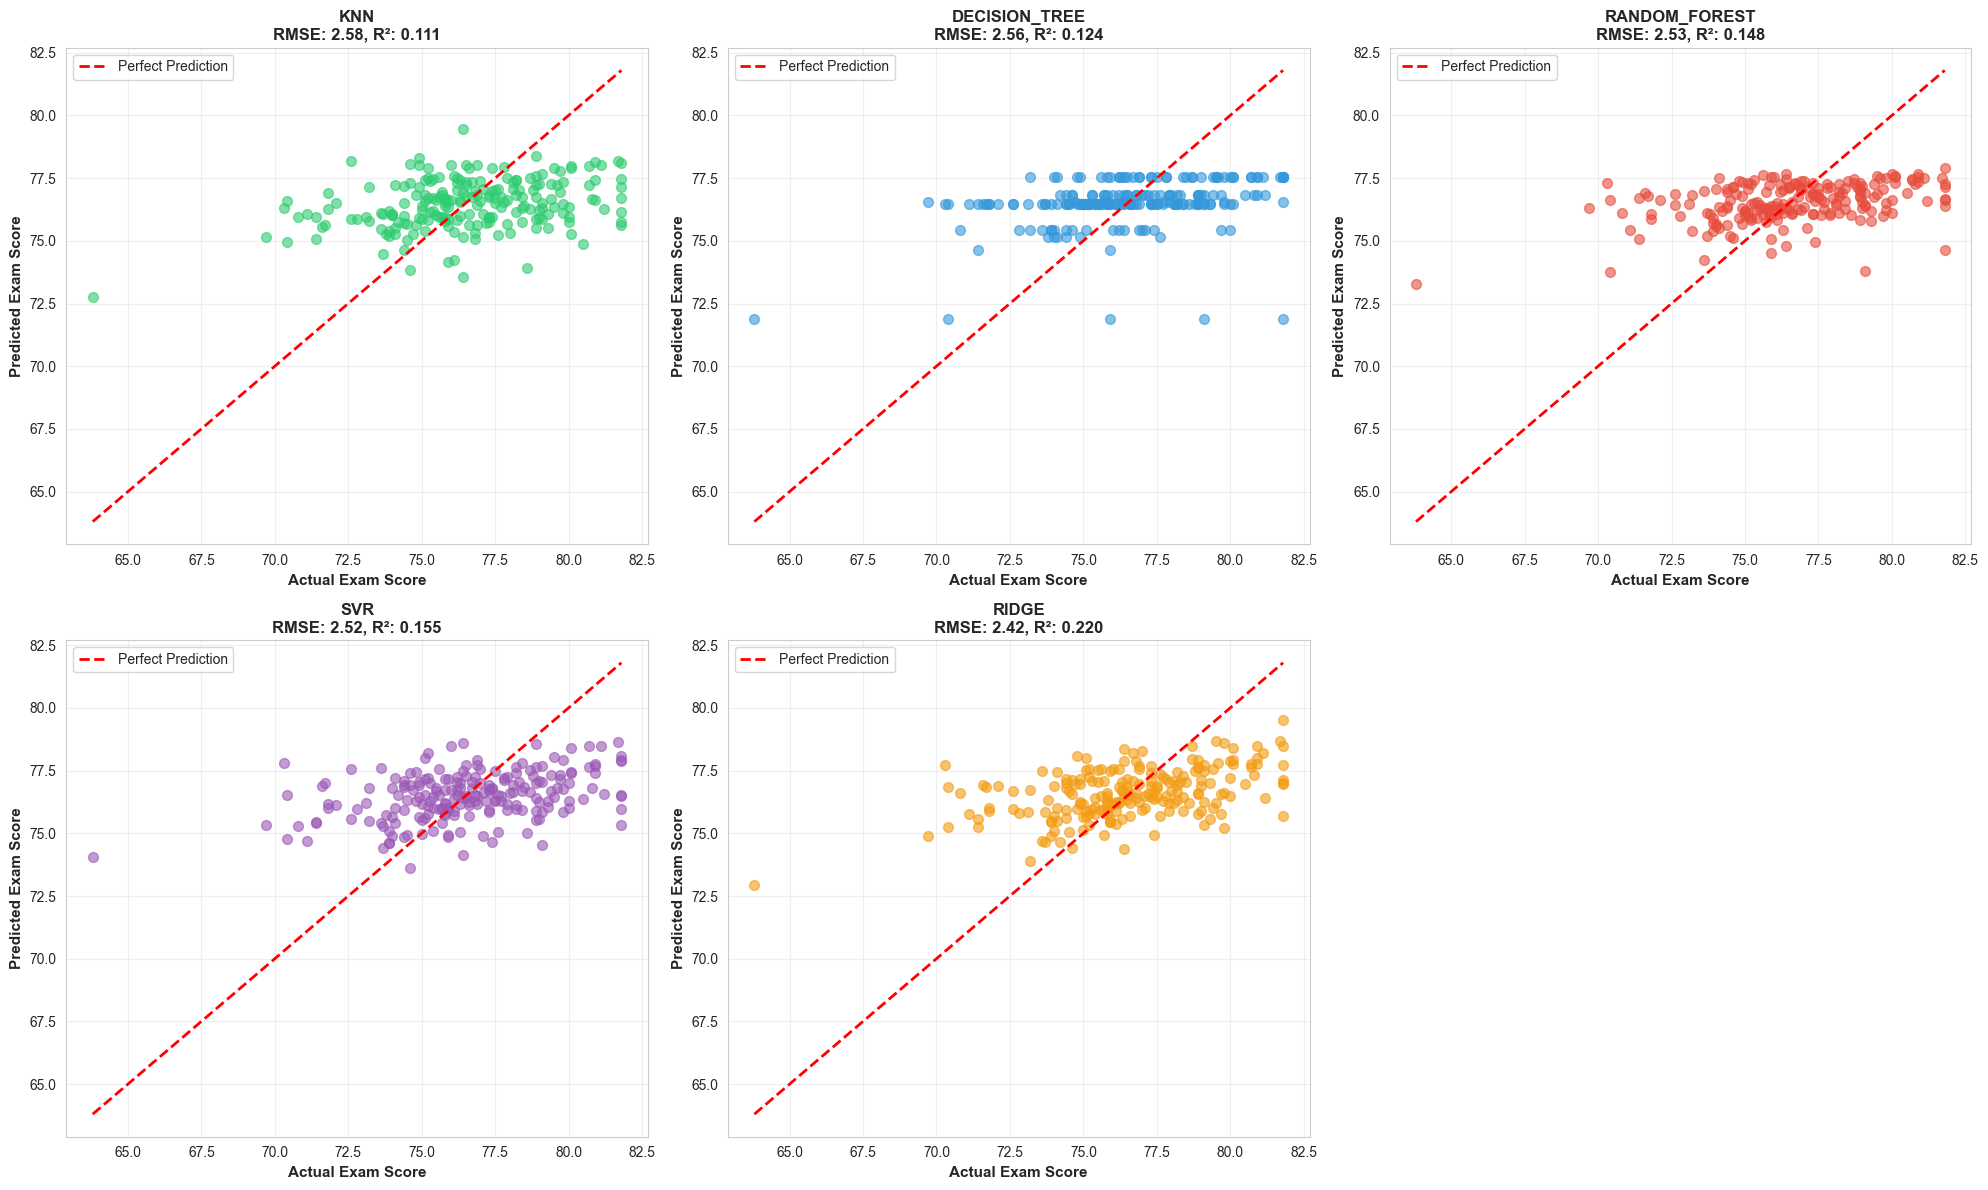

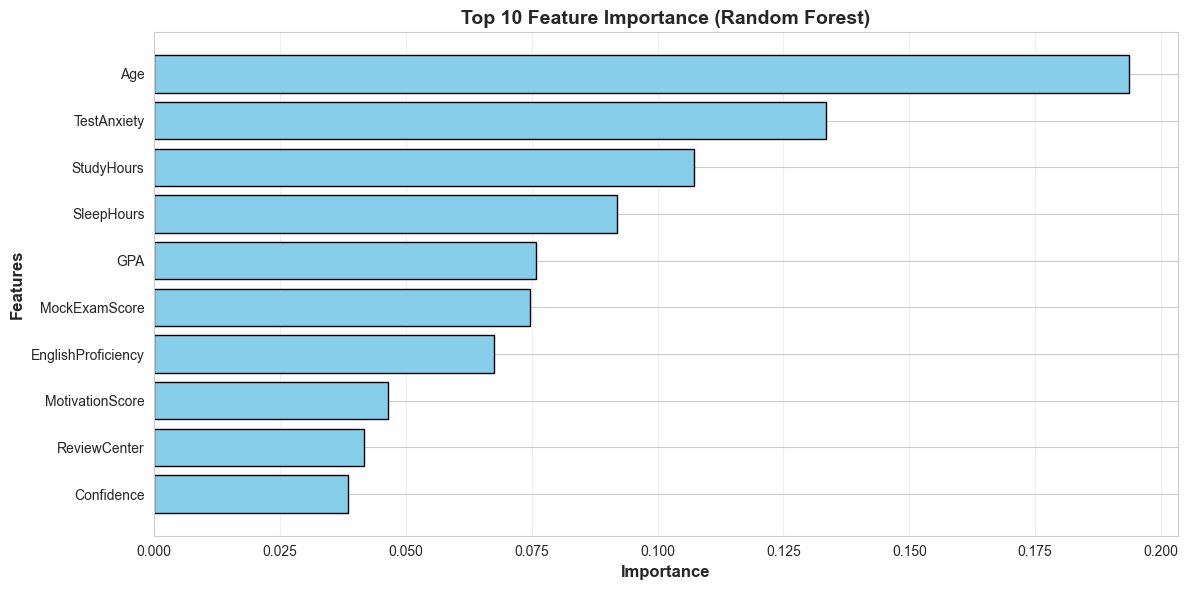


📊 Feature Importance:


,Feature,Importance
3,Age,0.193648
7,TestAnxiety,0.133408
4,StudyHours,0.107174
5,SleepHours,0.091895
9,GPA,0.075796
8,MockExamScore,0.074682
12,EnglishProficiency,0.067562
13,MotivationScore,0.046503
15,ReviewCenter,0.041734
6,Confidence,0.038474



Saving trained models...
   Saved: knn_model.pkl
   Verified: knn_model.pkl
   Saved: decision_tree_model.pkl
   Verified: decision_tree_model.pkl
   Saved: random_forest_model.pkl
   Verified: random_forest_model.pkl
   Saved: svr_model.pkl
   Verified: svr_model.pkl
   Saved: ridge_model.pkl
   Verified: ridge_model.pkl

Models saved to saved_base_models/
BASE MODELS TRAINING COMPLETE
CREATING AND SAVING PREPROCESSOR

Loading preprocessing components...
   Label encoders loaded
   Iterative imputer loaded
   Median imputer loaded
   Scaler loaded
   Feature names loaded
   Imputation config loaded

Creating preprocessor object...
   Created: RegressionPreprocessor(n_features=16, n_categorical=3, n_numerical=12, n_binary=1)

Saving preprocessor...
   Preprocessor saved: ../saved_ensemble_models/preprocessor.pkl
   File size: 5884 bytes

Verifying saved preprocessor...
   Preprocessor verified: RegressionPreprocessor(n_features=16, n_categorical=3, n_numerical=12, n_binary=1)
   Featu

In [ ]:
# Cell 1: Imports
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
import json
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

print("✅ All libraries imported successfully")

# Cell 2: Preprocessed Data
X_train = np.load('../regression_processed_data/X_train.npy')
X_test = np.load('../regression_processed_data/X_test.npy')
y_train = np.load('../regression_processed_data/y_train.npy')
y_test = np.load('../regression_processed_data/y_test.npy')

print(f"📊 Data Loaded:")
print(f"   Training samples: {X_train.shape[0]}")
print(f"   Test samples: {X_test.shape[0]}")
print(f"   Features: {X_train.shape[1]}")
print(f"   Target range: [{y_train.min():.2f}, {y_train.max():.2f}]")

# Cell 3: Define Model Configurations
model_configs = {
    'knn': {
        'model': KNeighborsRegressor(),
        'params': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance']
        }
    },
    'decision_tree': {
        'model': DecisionTreeRegressor(random_state=42),
        'params': {
            'max_depth': [3, 5, 7, 10, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'random_forest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [5, 10, 15, None],
            'min_samples_split': [2, 5, 10]
        }
    },
        'svr': {
        'model': SVR(),
        'params': {
            'C': [0.1, 1.0, 10.0],
            'epsilon': [0.01, 0.1, 0.2],
            'kernel': ['rbf']
        }
    },
    'ridge': {
        'model': Ridge(),
        'params': {
            'alpha': [0.1, 1.0, 10.0, 100.0]
        }
    }
}

print("🔧 Model Configurations:")
for name in model_configs.keys():
    print(f"   ✓ {name.upper()}")

# Cell 4: Train Models with 10-Fold CV
from sklearn.model_selection import KFold

results = {}
cv = KFold(n_splits=10, shuffle=True, random_state=42)

print("=" * 70)
print("TRAINING BASE MODELS WITH 10-FOLD CROSS-VALIDATION")
print("=" * 70)

for name, config in model_configs.items():
    print(f"\n🔄 Training {name.upper()}...")
    
    grid_search = GridSearchCV(
        config['model'],
        config['params'],
        cv=cv,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        return_train_score=True
    )
    
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    
    cv_results = grid_search.cv_results_
    best_index = grid_search.best_index_
    
    fold_scores = []
    for fold_idx in range(10):
        fold_key = f'split{fold_idx}_test_score'
        fold_scores.append(-cv_results[fold_key][best_index])
    
    cv_mean = np.mean(fold_scores)
    cv_std = np.std(fold_scores)
    cv_min = np.min(fold_scores)
    cv_max = np.max(fold_scores)
    
    cv_rmse = np.sqrt(cv_mean)
    
    y_pred = best_model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_pred)
    test_rmse = np.sqrt(test_mse)
    test_mae = mean_absolute_error(y_test, y_pred)
    test_r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        'model': best_model,
        'cv_mse_mean': cv_mean,
        'cv_mse_std': cv_std,
        'cv_mse_min': cv_min,
        'cv_mse_max': cv_max,
        'cv_rmse': cv_rmse,
        'cv_10fold_scores': fold_scores,
        'test_mse': test_mse,
        'test_rmse': test_rmse,
        'test_mae': test_mae,
        'test_r2': test_r2,
        'y_pred': y_pred,
        'best_params': grid_search.best_params_
    }
    
    print(f"   ✅ {name.upper()} Trained")
    print(f"      10-Fold CV RMSE: {cv_rmse:.4f} ± {np.sqrt(cv_std):.4f}")
    print(f"      Test RMSE: {test_rmse:.4f}")
    print(f"      Test MAE: {test_mae:.4f}")
    print(f"      Test R²: {test_r2:.4f}")
    print(f"      Best Params: {grid_search.best_params_}")

# Cell 5: Visualize 10-Fold CV Results
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

model_names = list(results.keys())
colors = ['#2ecc71', '#3498db', '#e74c3c',  '#9b59b6', '#f39c12']

# Plot 1: Box plot of 10-fold scores (RMSE)
fold_data = []
for name in model_names:
    for fold_idx, mse in enumerate(results[name]['cv_10fold_scores'], 1):
        fold_data.append({
            'Model': name.upper(),
            'Fold': fold_idx,
            'RMSE': np.sqrt(mse)
        })

fold_df = pd.DataFrame(fold_data)

box_positions = []
for idx, name in enumerate(model_names):
    model_data = fold_df[fold_df['Model'] == name.upper()]['RMSE']
    bp = axes[0, 0].boxplot([model_data], positions=[idx], widths=0.6,
                            patch_artist=True,
                            boxprops=dict(facecolor=colors[idx], alpha=0.7),
                            medianprops=dict(color='black', linewidth=2))
    box_positions.append(idx)

axes[0, 0].set_xticks(box_positions)
axes[0, 0].set_xticklabels([name.upper() for name in model_names])
axes[0, 0].set_ylabel('RMSE', fontsize=12, fontweight='bold')
axes[0, 0].set_title('10-Fold Cross-Validation RMSE Distribution', fontsize=14, fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3)

# Plot 2: Line plot showing each fold's performance
for idx, name in enumerate(model_names):
    fold_rmse = [np.sqrt(mse) for mse in results[name]['cv_10fold_scores']]
    axes[0, 1].plot(range(1, 11), fold_rmse, marker='o', linewidth=2,
                   label=name.upper(), color=colors[idx])

axes[0, 1].set_xlabel('Fold Number', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('RMSE', fontsize=12, fontweight='bold')
axes[0, 1].set_title('RMSE Across 10 Folds', fontsize=14, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)
axes[0, 1].set_xticks(range(1, 11))

# Plot 3: CV RMSE vs Test RMSE comparison
x = np.arange(len(model_names))
width = 0.35

cv_rmse_values = [results[name]['cv_rmse'] for name in model_names]
test_rmse_values = [results[name]['test_rmse'] for name in model_names]

bars1 = axes[1, 0].bar(x - width/2, cv_rmse_values, width, label='10-Fold CV RMSE',
                       color=colors, alpha=0.8)
bars2 = axes[1, 0].bar(x + width/2, test_rmse_values, width, label='Test RMSE',
                       color=colors, alpha=0.5)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[1, 0].text(bar.get_x() + bar.get_width()/2., height,
                       f'{height:.2f}', ha='center', va='bottom', fontsize=9)

axes[1, 0].set_xlabel('Models', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('RMSE', fontsize=12, fontweight='bold')
axes[1, 0].set_title('10-Fold CV RMSE vs Test RMSE', fontsize=14, fontweight='bold')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels([name.upper() for name in model_names])
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)

# Plot 4: R² Score comparison
r2_scores = [results[name]['test_r2'] for name in model_names]

bars = axes[1, 1].bar([name.upper() for name in model_names], r2_scores,
                      color=colors, alpha=0.8)

for bar in bars:
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.4f}', ha='center', va='bottom', fontsize=10)

axes[1, 1].set_xlabel('Models', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('R² Score', fontsize=12, fontweight='bold')
axes[1, 1].set_title('R² Score (Higher is Better)', fontsize=14, fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)
axes[1, 1].set_ylim([0, 1])

plt.tight_layout()
plt.show()

# Cell 6: Performance Summary Table
summary_data = []
for name in model_names:
    summary_data.append({
        'Model': name.upper(),
        'CV RMSE': f"{results[name]['cv_rmse']:.4f}",
        'Test RMSE': f"{results[name]['test_rmse']:.4f}",
        'Test MAE': f"{results[name]['test_mae']:.4f}",
        'Test R²': f"{results[name]['test_r2']:.4f}"
    })

summary_df = pd.DataFrame(summary_data)
print("\n" + "=" * 70)
print("MODEL PERFORMANCE SUMMARY")
print("=" * 70)
display(summary_df)

best_model_name = min(results.items(), key=lambda x: x[1]['test_rmse'])[0]
print(f"\nBest Model: {best_model_name.upper()}")
print(f"   Test RMSE: {results[best_model_name]['test_rmse']:.4f}")
print(f"   Test R²: {results[best_model_name]['test_r2']:.4f}")

print("\n" + "=" * 70)
print("DETAILED TEST RESULTS")
print("=" * 70)

for name in model_names:
    y_pred = results[name]['y_pred']
    rmse = results[name]['test_rmse']
    mae = results[name]['test_mae']
    r2 = results[name]['test_r2']
    
    print(f"\n{name.upper()}")
    print(f"   Test RMSE: {rmse:.4f}")
    print(f"   Test MAE:  {mae:.4f}")
    print(f"   Test R²:   {r2:.4f}")
    print(f"   10-Fold CV RMSE: {results[name]['cv_rmse']:.4f} ± {results[name]['cv_mse_std']:.4f}")
    
    residuals = y_test - y_pred
    print(f"   Mean Residual: {np.mean(residuals):.4f}")
    print(f"   Std Residual:  {np.std(residuals):.4f}")

# Cell 6.5: Detailed Test Predictions Analysis
print("\n" + "=" * 70)
print("TEST PREDICTIONS ANALYSIS")
print("=" * 70)

for name in model_names:
    y_pred = results[name]['y_pred']
    
    prediction_details = pd.DataFrame({
        'Actual': y_test,
        'Predicted': y_pred,
        'Error': y_test - y_pred,
        'Absolute_Error': np.abs(y_test - y_pred),
        'Percent_Error': np.abs((y_test - y_pred) / y_test) * 100
    })
    
    print(f"\n{name.upper()}")
    print(f"   Total Test Samples: {len(y_test)}")
    print(f"   Mean Absolute Error: {prediction_details['Absolute_Error'].mean():.4f}")
    print(f"   Median Absolute Error: {prediction_details['Absolute_Error'].median():.4f}")
    print(f"   Max Error: {prediction_details['Absolute_Error'].max():.4f}")
    print(f"   Min Error: {prediction_details['Absolute_Error'].min():.4f}")
    
    print(f"\n   First 10 predictions:")
    print(prediction_details.head(10).to_string(index=False))
    
    csv_file = f'../saved_base_models/{name}_test_predictions.csv'
    prediction_details.to_csv(csv_file, index=False)
    print(f"\n   Saved detailed predictions: {csv_file}")

# Cell 7: Prediction vs Actual Plots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for idx, name in enumerate(model_names):
    y_pred = results[name]['y_pred']
    
    # Scatter plot
    axes[idx].scatter(y_test, y_pred, alpha=0.6, s=50, color=colors[idx])
    
    # Perfect prediction line
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    axes[idx].plot([min_val, max_val], [min_val, max_val], 
                   'r--', linewidth=2, label='Perfect Prediction')
    
    # Metrics
    rmse = results[name]['test_rmse']
    r2 = results[name]['test_r2']
    
    axes[idx].set_xlabel('Actual Exam Score', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Predicted Exam Score', fontsize=11, fontweight='bold')
    axes[idx].set_title(f'{name.upper()}\nRMSE: {rmse:.2f}, R²: {r2:.3f}',
                       fontsize=12, fontweight='bold')
    axes[idx].legend()
    axes[idx].grid(alpha=0.3)

axes[5].axis('off')

plt.tight_layout()
plt.show()

# Cell 8: Feature Importance
if 'random_forest' in results:
    feature_names = json.load(open('../regression_processed_data/feature_names.json'))
    
    rf_model = results['random_forest']['model']
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Importance': rf_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(12, 6))
    plt.barh(feature_importance['Feature'][:10], 
             feature_importance['Importance'][:10],
             color='skyblue', edgecolor='black')
    plt.xlabel('Importance', fontsize=12, fontweight='bold')
    plt.ylabel('Features', fontsize=12, fontweight='bold')
    plt.title('Top 10 Feature Importance (Random Forest)', 
              fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("\n📊 Feature Importance:")
    display(feature_importance)

# Cell 9: Save Models
os.makedirs('../saved_base_models', exist_ok=True)

print("\nSaving trained models...")
for name, data in results.items():
    model_path = f'../saved_base_models/{name}_model.pkl'
    try:
        with open(model_path, 'wb') as f:
            joblib.dump(data['model'], f, compress=3)
        print(f"   Saved: {name}_model.pkl")
        
        # Verify the saved model
        test_load = joblib.load(model_path)
        print(f"   Verified: {name}_model.pkl")
    except Exception as e:
        print(f"   ERROR saving {name}_model.pkl: {e}")

print("\nModels saved to saved_base_models/")
print("BASE MODELS TRAINING COMPLETE")

# Cell 10: Create and Save Preprocessor
import joblib
import os
import sys
import json

# Ensure saved_ensemble_models directory exists
os.makedirs('../saved_ensemble_models', exist_ok=True)
os.makedirs('../saved_base_models', exist_ok=True)

models_path = os.path.abspath('..')
if models_path not in sys.path:
    sys.path.insert(0, models_path)

# Import with experimental flag
from sklearn.experimental import enable_iterative_imputer
from regression_preprocessor import RegressionPreprocessor

print("=" * 70)
print("CREATING AND SAVING PREPROCESSOR")
print("=" * 70)

try:
    # Load the preprocessing components
    print("\nLoading preprocessing components...")
    
    label_encoders = joblib.load('../regression_processed_data/label_encoders.pkl')
    print("   Label encoders loaded")
    
    iterative_imputer = joblib.load('../regression_processed_data/iterative_imputer.pkl')
    print("   Iterative imputer loaded")
    
    median_imputer = joblib.load('../regression_processed_data/median_imputer.pkl')
    print("   Median imputer loaded")
    
    scaler = joblib.load('../regression_processed_data/scaler.pkl')
    print("   Scaler loaded")
    
    with open('../regression_processed_data/feature_names.json', 'r') as f:
        feature_names = json.load(f)
    print("   Feature names loaded")
    
    with open('../regression_processed_data/imputation_config.json', 'r') as f:
        imputation_config = json.load(f)
    print("   Imputation config loaded")
    
    # Create preprocessor with both imputers
    print("\nCreating preprocessor object...")
    preprocessor = RegressionPreprocessor(
        iterative_imputer=iterative_imputer,
        median_imputer=median_imputer,
        label_encoders=label_encoders,
        scaler=scaler,
        imputation_config=imputation_config
    )
    print(f"   Created: {preprocessor}")
    
    # Save preprocessor
    print("\nSaving preprocessor...")
    preprocessor_path = '../saved_ensemble_models/preprocessor.pkl'
    
    with open(preprocessor_path, 'wb') as f:
        joblib.dump(preprocessor, f, compress=3)
    
    # Verify the save was successful
    file_size = os.path.getsize(preprocessor_path)
    print(f"   Preprocessor saved: {preprocessor_path}")
    print(f"   File size: {file_size} bytes")
    
    # Test loading the preprocessor
    print("\nVerifying saved preprocessor...")
    test_load = joblib.load(preprocessor_path)
    print(f"   Preprocessor verified: {test_load}")
    print(f"   Feature names count: {len(test_load.get_feature_names())}")
    
    # Save feature names
    feature_names_path = '../saved_ensemble_models/feature_names.pkl'
    with open(feature_names_path, 'wb') as f:
        joblib.dump(feature_names, f, compress=3)
    print(f"   Feature names saved: {feature_names_path}")
    
    # Save imputation config copy
    config_path = '../saved_ensemble_models/imputation_config.json'
    with open(config_path, 'w') as f:
        json.dump(imputation_config, f, indent=2)
    print(f"   Imputation config saved: {config_path}")
    
    print("\n" + "=" * 70)
    print("FILES CREATED:")
    print("=" * 70)
    print(f"   {preprocessor_path} ({os.path.getsize(preprocessor_path)} bytes)")
    print(f"   {feature_names_path} ({os.path.getsize(feature_names_path)} bytes)")
    print(f"   {config_path}")
    print("\nPreprocessor creation complete")
    
except FileNotFoundError as e:
    print(f"\nERROR: Required file not found: {e}")
    print("\nPlease run the preprocessing notebook first to generate:")
    print("   - regression_processed_data/imputation_config.json")
    print("   - regression_processed_data/label_encoders.pkl")
    print("   - regression_processed_data/scaler.pkl")
    print("   - regression_processed_data/feature_names.json")
    
except Exception as e:
    print(f"\nERROR: Failed to create preprocessor: {e}")
    import traceback
    traceback.print_exc()